# Plot the histogram and KDE 

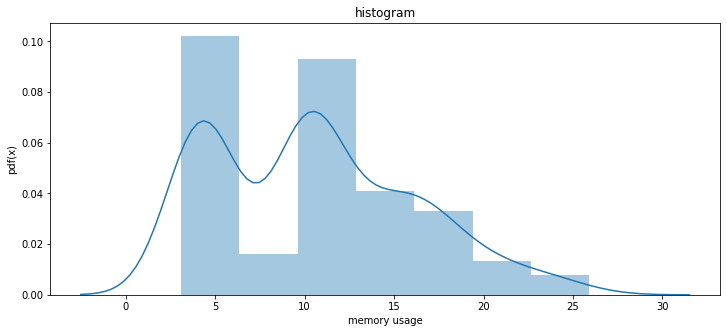

In [8]:
xs = [i['avg'] for i in reports ]
f, ax1 = plt.subplots(figsize=(12, 5),
                       sharey=True)
ax1.set_title('histogram')
ax1.set_xlabel('memory usage')
ax1.set_ylabel('pdf(x)')
sns.distplot(xs, ax=ax1, hist=True)

# Now we can predict extensive memory bandwidth utilization

In [9]:
usage = 50
grsf = norm.sf(x=usage, loc=mean, scale=stdv)
grsf

5.029555167965818e-13

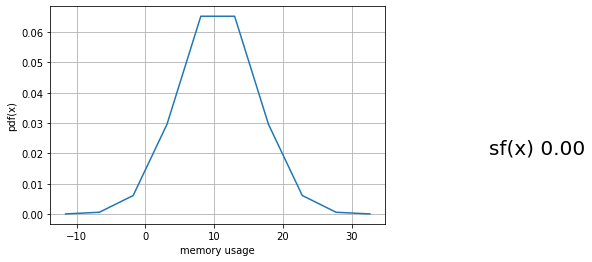

In [10]:
fig, ax = plt.subplots()
x = np.linspace(mean-4*stdv,mean+4*stdv, int(mean))
p = norm.pdf(x, scale=stdv, loc=mean) 
ax.plot(x, norm.pdf(x, scale=stdv, loc=mean), label='stdv=%.1f' % stdv)
ax.set_xlabel('memory usage')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(usage, mean+4*stdv, 0.01)
ax.fill_between(px,norm.pdf(px,scale=stdv, loc=mean),alpha=0.5, color='r')
ax.text(usage,0.02,"sf(x) %.2f" %(grsf), fontsize=20)
plt.show()

# The above graph is the same as 1−𝑃

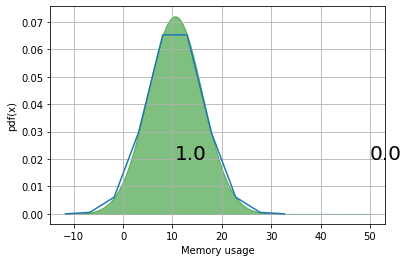

In [11]:
gr=1-grsf
fig, ax = plt.subplots()
x = np.linspace(mean-4*stdv,mean+4*stdv, int(mean))
p = norm.pdf(x, scale=stdv, loc=mean)
ax.plot(x, p)
ax.set_xlabel('Memory usage')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(usage, mean+4*stdv, 0.01)
ax.fill_between(px,norm.pdf(px,scale=stdv, loc=mean),alpha=0.5, color='r')
px1=np.arange(mean-4*stdv, usage, 0.01)
ax.fill_between(px1,norm.pdf(px1,scale=stdv, loc=mean),alpha=0.5, color='g')
ax.text(mean,0.02,round(gr,2), fontsize=20)
ax.text(usage, 0.02,round(grsf,2), fontsize=20)
plt.show()